[[ 50. -25.   0.   0.]
 [-25.  50. -25.   0.]
 [  0. -25.  50. -25.]
 [  0.   0. -25.  50.]]


C:\Users\isido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


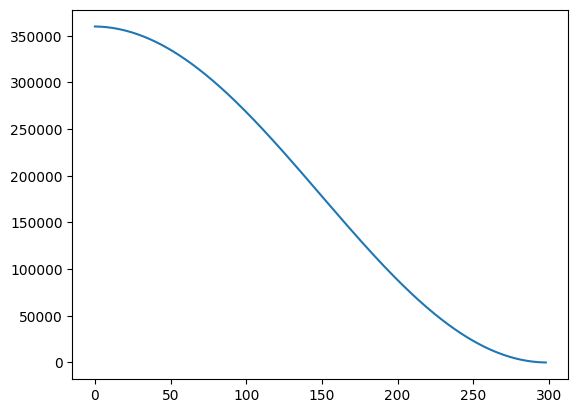

In [2]:
from scipy.sparse import diags
import scipy as sp
import matplotlib.pyplot as plt

def poisson(n): return n**2*diags([-1,2,-1],[-1,0,1],(n-1,n-1))

print(poisson(5).toarray())
eig = sp.linalg.eig(poisson(300).toarray())
q = sorted(eig[0])[::-1]

plt.plot(range(len(q)),q)
plt.show()

In [20]:
import numpy as np
from scipy.sparse import spdiags
from scipy.sparse import eye
from scipy.sparse.linalg import inv
from ipywidgets import interact

def wjacobi(v0,A,f,nu,w):
    n = A.shape[0]+1
    D = spdiags(A.diagonal(),[0],(n-1,n-1)) 
    Rw = eye(n-1)-w*inv(D)@A
    ff =  w*inv(D)@f
    for _ in range(nu):
        v0 = Rw@v0 +ff
    return v0

def plot_interactive(n, omega,nu):
    A = poisson(n)
    v0 = 10 * np.array([np.sin(j * 3) for j in range(n - 1)])
    # v0 = np.zeros(n-1) 
    # v0[(n-1)//2] = 100
    f = np.zeros(n - 1)
    f[0] = -5 * n ** 2
    f[-1] = 5 * n ** 2

    sol = v0
    for i in range(5):
        plt.plot(range(len(sol)), sol, label=i)
        sol = wjacobi(sol, A, f, nu, omega)
    v0[n//2 + 1] = -100

    plt.legend()
    plt.show()

# Set initial values
n_initial = 3
omega_initial = 0.5
nu = 1

# Create an interactive widget
interact(
    plot_interactive,
    n=(3, 50, 1),  # Adjust the range and step size as needed
    omega=(0.1, 1.0, 0.01),  # Adjust the range and step size as needed
    nu = (1,100,5),
    continuous_update=False,  # Set to True for real-time update
)

interactive(children=(IntSlider(value=26, description='n', max=50, min=3), FloatSlider(value=0.55, description…

<function __main__.plot_interactive(n, omega, nu)>